<a href="https://colab.research.google.com/github/raissadhrmswr/Project/blob/main/1_Loan_Eligibility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Collection

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Loan_Data.csv")

In [ ]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Cleaning

Check if there are NaN Value

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- Change NaN value on Gender, Married, Dependents, Self_Employed by 0
- Change NaN value on Loan_Amount, Loan_Amount_Term by its mean value.
- Remove NaN value on Credit_History.

In [ ]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

df.dropna(subset = ['Credit_History'], inplace=True)

Recheck if there are still NaN

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Check Outlier Using Boxplot

<Axes: xlabel='ApplicantIncome'>

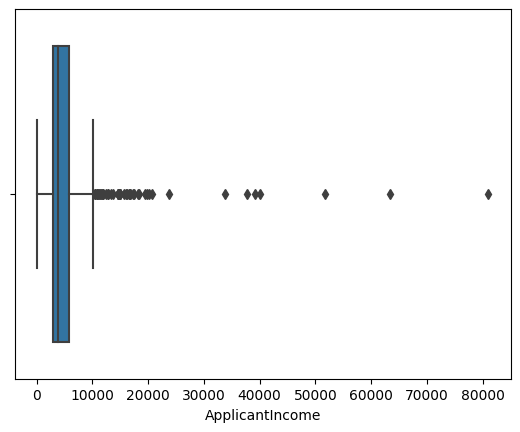

In [ ]:
sns.boxplot(x=df["ApplicantIncome"])

<Axes: xlabel='CoapplicantIncome'>

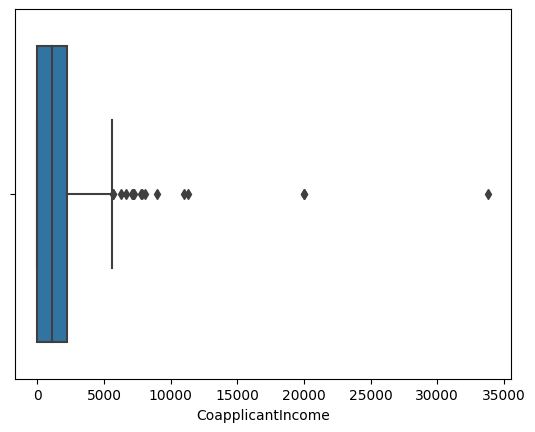

In [ ]:
sns.boxplot(x=df["CoapplicantIncome"])

<Axes: xlabel='LoanAmount'>

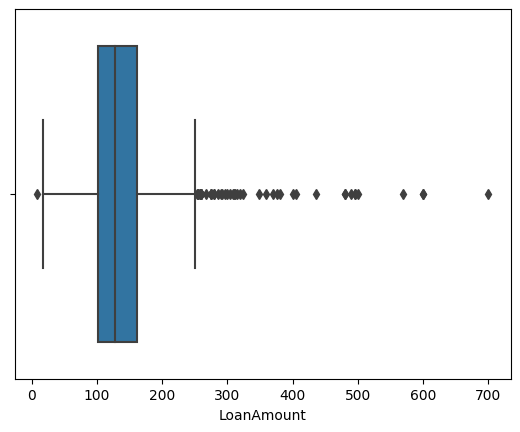

In [ ]:
sns.boxplot(x=df["LoanAmount"])

<Axes: xlabel='Loan_Amount_Term'>

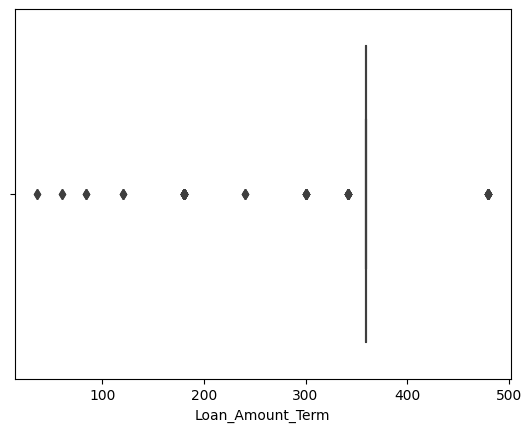

In [ ]:
sns.boxplot(x=df["Loan_Amount_Term"])

From outlier that has been describe by boxplot, next step is remove column that contain outlier using calculating IQR.

In [ ]:
data = df["ApplicantIncome"]
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = (q3-q1)
upper_bound = (q3 + 1.5 * iqr)
lower_bound = (q1 - 1.5 * iqr)
df_clean = df.drop(df[((data < lower_bound) & (data > upper_bound)) | ((data < lower_bound) | (data > upper_bound))].index)
print("q1:", q1,
      "q3:", q3,
      "upper bound:", upper_bound,
      "lower bound:", lower_bound,
      df_clean.shape)

q1: 2892.75 q3: 5803.75 upper bound: 10170.25 lower bound: -1473.75 (517, 13)


In [ ]:
data = df["CoapplicantIncome"]
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = (q3-q1)
upper_bound = (q3 + 1.5 * iqr)
lower_bound = (q1 - 1.5 * iqr)
df_clean = df.drop(df[((data < lower_bound) & (data > upper_bound)) | ((data < lower_bound) | (data > upper_bound))].index)
print("q1:", q1,
      "q3:", q3,
      "upper bound:", upper_bound,
      "lower bound:", lower_bound,
      df_clean.shape)

q1: 0.0 q3: 2250.0 upper bound: 5625.0 lower bound: -3375.0 (547, 13)


In [ ]:
data = df["LoanAmount"]
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = (q3-q1)
upper_bound = (q3 + 1.5 * iqr)
lower_bound = (q1 - 1.5 * iqr)
df_clean = df.drop(df[((data < lower_bound) & (data > upper_bound)) | ((data < lower_bound) | (data > upper_bound))].index)
print("q1:", q1,
      "q3:", q3,
      "upper bound:", upper_bound,
      "lower bound:", lower_bound,
      df_clean.shape)

q1: 101.75 q3: 162.0 upper bound: 252.375 lower bound: 11.375 (518, 13)


In [ ]:
data = df["Loan_Amount_Term"]
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = (q3-q1)
upper_bound = (q3 + 1.5 * iqr)
lower_bound = (q1 - 1.5 * iqr)
df_clean = df.drop(df[((data < lower_bound) & (data > upper_bound)) | ((data < lower_bound) | (data > upper_bound))].index)
print("q1:", q1,
      "q3:", q3,
      "upper bound:", upper_bound,
      "lower bound:", lower_bound,
      df_clean.shape)

q1: 360.0 q3: 360.0 upper bound: 360.0 lower bound: 360.0 (470, 13)


# Data Exploration

In [ ]:
df_clean.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,470.000000,470.000000,470.000000,470.0,470.000000
mean,5371.953191,1542.447064,146.849827,360.0,0.859574
std,5615.185357,2579.335779,77.359566,0.0,0.347798
min,150.000000,0.000000,9.000000,360.0,0.000000
25%,2904.250000,0.000000,104.000000,360.0,1.000000
50%,3862.000000,1211.500000,130.500000,360.0,1.000000
75%,5795.000000,2219.750000,165.750000,360.0,1.000000
max,81000.000000,33837.000000,600.000000,360.0,1.000000


[Text(0, 0, '382'), Text(0, 0, '88')]

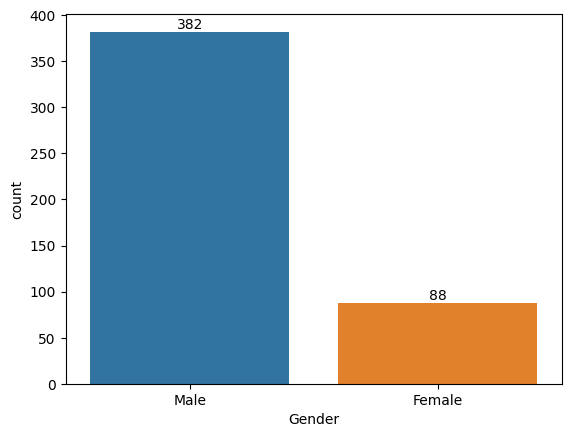

In [ ]:
ax = sns.countplot(x='Gender', data=df_clean)
ax.bar_label(ax.containers[0])

[Text(0, 0, '172'), Text(0, 0, '298')]

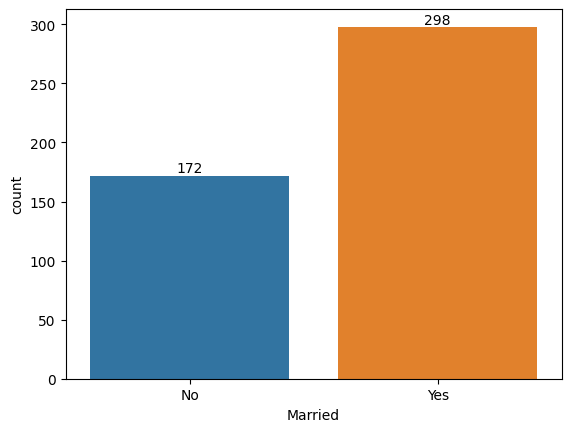

In [ ]:
ax = sns.countplot(x='Married', data=df_clean)
ax.bar_label(ax.containers[0])

[Text(0, 0, '281'), Text(0, 0, '71'), Text(0, 0, '82'), Text(0, 0, '36')]

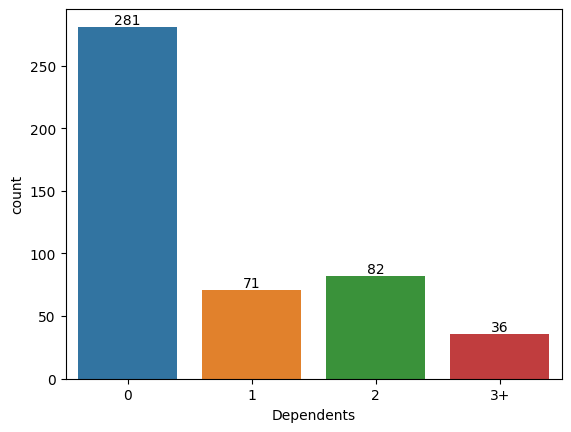

In [ ]:
ax = sns.countplot(x='Dependents', data=df_clean)
ax.bar_label(ax.containers[0])

[Text(0, 0, '380'), Text(0, 0, '90')]

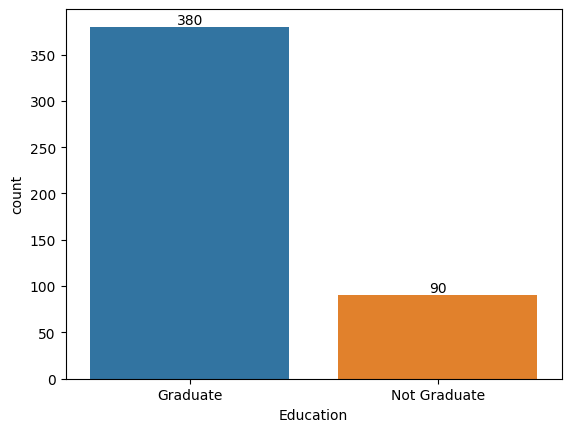

In [ ]:
ax = sns.countplot(x='Education', data=df_clean)
ax.bar_label(ax.containers[0])

[Text(0, 0, '408'), Text(0, 0, '62')]

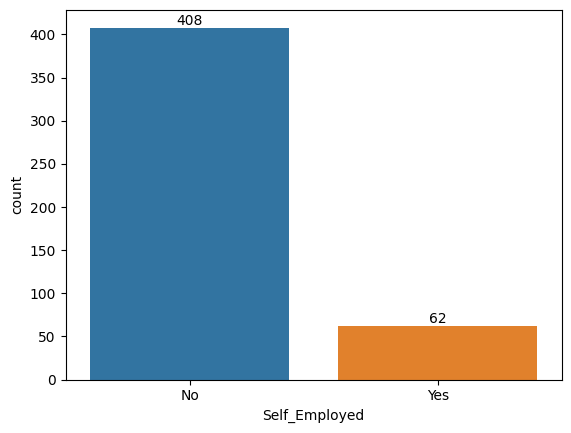

In [ ]:
ax = sns.countplot(x='Self_Employed', data=df_clean)
ax.bar_label(ax.containers[0])

[Text(0, 0, '142'), Text(0, 0, '144'), Text(0, 0, '184')]

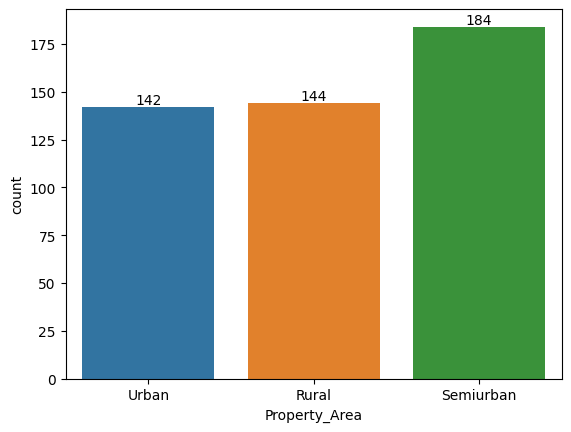

In [ ]:
ax = sns.countplot(x='Property_Area', data=df_clean)
ax.bar_label(ax.containers[0])

[Text(0, 0, '329'), Text(0, 0, '141')]

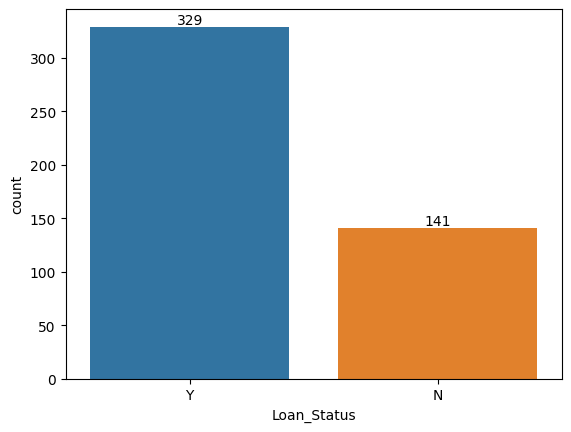

In [ ]:
ax = sns.countplot(x='Loan_Status', data=df_clean)
ax.bar_label(ax.containers[0])

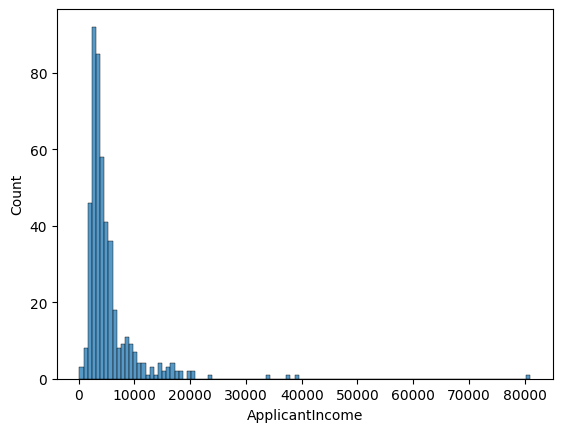

In [ ]:
ax = sns.histplot(x='ApplicantIncome', data=df_clean)

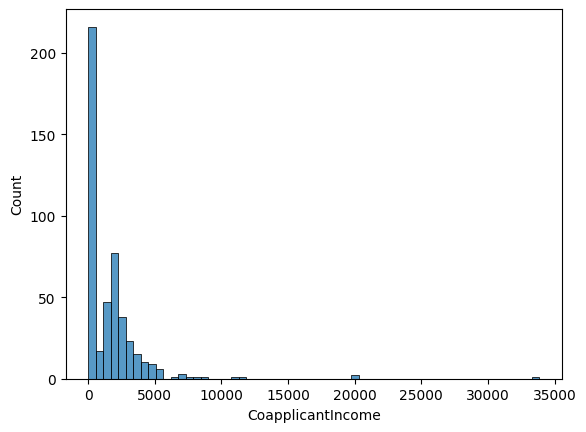

In [ ]:
ax = sns.histplot(x='CoapplicantIncome', data=df_clean)

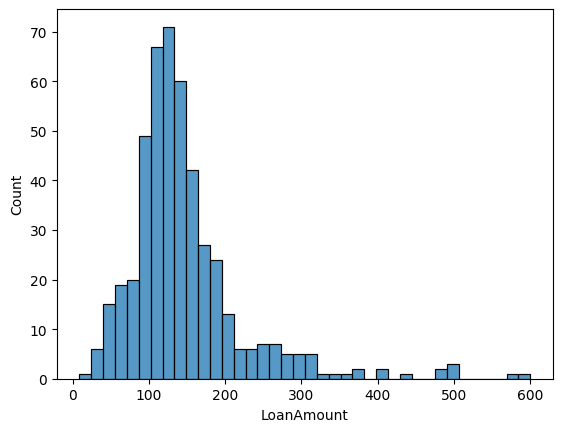

In [ ]:
ax = sns.histplot(x='LoanAmount', data=df_clean)

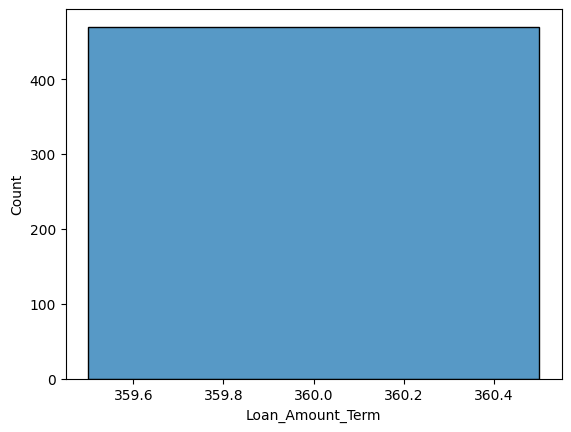

In [ ]:
ax = sns.histplot(x='Loan_Amount_Term', data=df_clean)

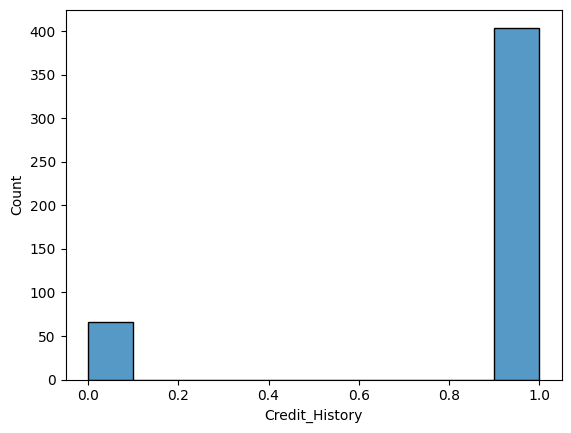

In [ ]:
ax = sns.histplot(x='Credit_History', data=df_clean)

# Data Modelling

**Pre Processing**

In [ ]:
df_clean = df.drop('Loan_ID', axis = 1)
df_clean.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
df_clean.shape

(564, 12)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le_gender = LabelEncoder()
le_married = LabelEncoder()
le_dependents = LabelEncoder()
le_education = LabelEncoder()
le_selfemployed = LabelEncoder()
le_propertyarea = LabelEncoder()
le_loanstatus = LabelEncoder()

In [ ]:
df_clean["Gender"] = le_gender.fit_transform(df["Gender"])
df_clean["Married"] = le_married.fit_transform(df["Married"])
df_clean["Dependents"] = le_dependents.fit_transform(df["Dependents"])
df_clean["Education"] = le_education.fit_transform(df["Education"])
df_clean["Self_Employed"] = le_selfemployed.fit_transform(df["Self_Employed"])
df_clean["Property_Area"] = le_propertyarea.fit_transform(df["Property_Area"])
df_clean["Loan_Status"] = le_loanstatus.fit_transform(df["Loan_Status"])

Preview on X and y

In [ ]:
X = df_clean.iloc[:,0:11]
y = df_clean.iloc[:,-1]

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


In [ ]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 564, dtype: int64

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

[Text(0, 0, '385'), Text(0, 0, '385')]

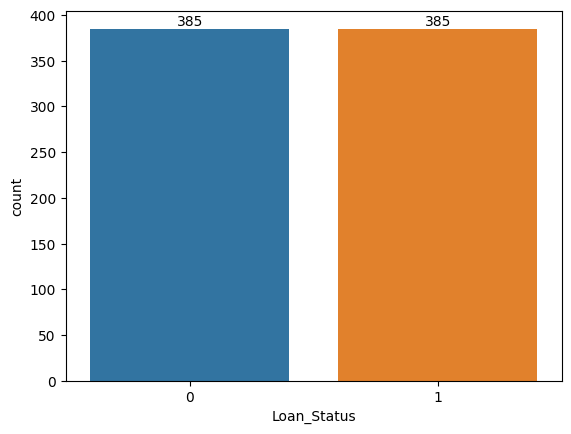

In [ ]:
ax = sns.countplot(x=y)
ax.bar_label(ax.containers[0])

**Modeling**

In [ ]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)
print("train_X: ", train_X.shape)
print("train_y: ", train_y.shape)
print("test_X: ", test_X.shape)
print("test_y: ", test_y.shape)

train_X:  (539, 11)
train_y:  (539,)
test_X:  (231, 11)
test_y:  (231,)


1. Decision Tree

In [ ]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(random_state=42)
dt = dt.fit(train_X, train_y)

2. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=5, n_estimators=100)
rf.fit(train_X, train_y)

RandomForestClassifier(max_features=5)

3. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr = lr.fit(train_X, train_y)

4. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb = nb.fit(train_X, train_y)

# Training Validation

ROC AUC Curve

In [ ]:
r_probs = [0 for _ in range(len(test_y))]
dt_probs = dt.predict_proba(test_X)
rf_probs = rf.predict_proba(test_X)
lr_probs = lr.predict_proba(test_X)
nb_probs = nb.predict_proba(test_X)

In [ ]:
dt_probs = dt_probs[:,1]
rf_probs = rf_probs[:, 1]
lr_probs = lr_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
r_auc = roc_auc_score(test_y, r_probs)
dt_auc = roc_auc_score(test_y,dt_probs)
rf_auc = roc_auc_score(test_y,rf_probs)
lr_auc = roc_auc_score(test_y,lr_probs)
nb_auc = roc_auc_score(test_y,nb_probs)

In [ ]:
r_fpr, r_tpr, _ = roc_curve(test_y, r_probs)
dt_fpr, dt_tpr, _ = roc_curve(test_y, dt_probs)
rf_fpr, rf_tpr, _ = roc_curve(test_y, rf_probs)
lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_probs)
nb_fpr, nb_tpr, _ = roc_curve(test_y, nb_probs)

In [ ]:
import matplotlib.pyplot as plt

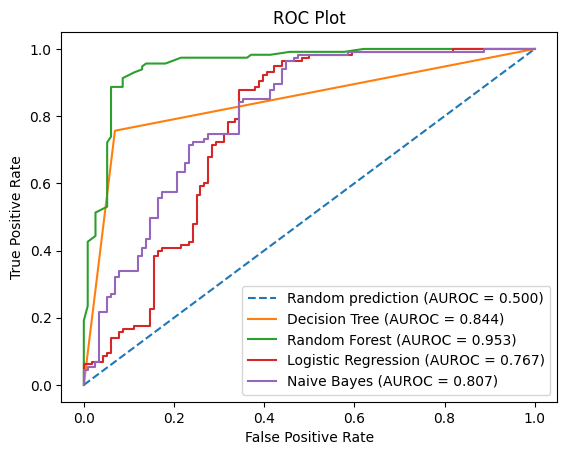

In [ ]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()